In [1]:
import sys
sys.path.append('../code')
from resnet import *
from funcs import *
from cifar_very_tiny import *
from cifar_dataset import *    
import torch as t 
import numpy as np
from numpy import polyfit
from numpy import polyval
import tqdm
import matplotlib.pylab as plt
import matplotlib.cm as cm
import json
import hyperparams
from importlib import reload
from scipy.interpolate import interp1d
from PIL import Image
%matplotlib inline
plt.rcParams['figure.figsize']=(12,9)
plt.rcParams['font.size']= 20

In [2]:
from matplotlib import pylab as plt

plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['axes.labelsize'] = 30

In [3]:
data_b = open_data_json("../log/exp33_nodistil.jsonl")
data_d = open_data_json("../log/exp33_distil.jsonl")
data_dr = open_data_json("../log/exp33_random.jsonl")
data_h = open_data_json("../log/exp33_opt.jsonl")
data_s = open_data_json("../log/exp33_splines.jsonl")
data_ho = open_data_json("../log/exp33_hyperopt.jsonl")

In [5]:
def plot_data_params(data, s, label, color, sign, shift = 0):
    e = np.array([data[0]['results'][i]['epoch'] for i in range(len(data[0]['results']))]) + shift
    par = np.array([subdata['results'][i][s] for i in range(len(data[0]['results'])) for subdata in data]).reshape(e.shape[0], -1)
    plt.plot(e, par.mean(1), sign, color=color, label=label, alpha=0.5, linewidth=3)
    plt.errorbar(e, par.mean(1), yerr=par.std(1), ecolor='grey', color=color, lw=0, 
             elinewidth=2, alpha=1.0)

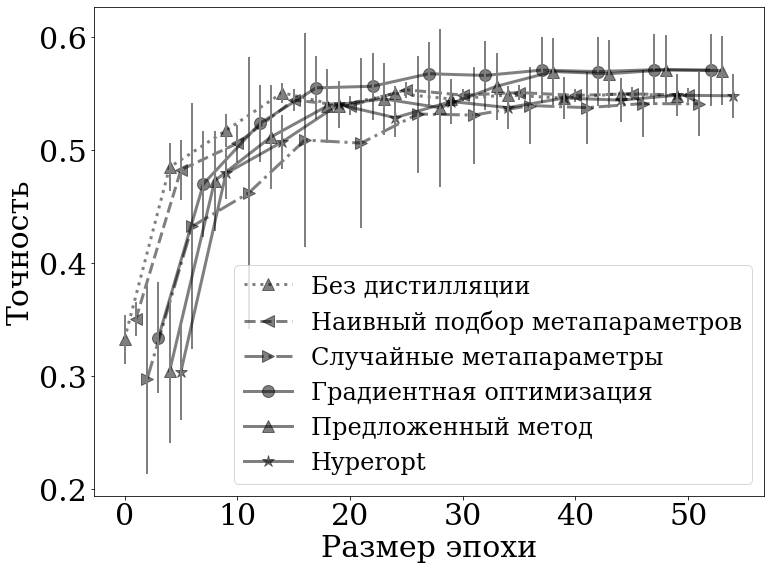

In [11]:
plot_data_params(data_b, 'accuracy', 'Без дистилляции', 'black', ':^')
plot_data_params(data_d, 'accuracy', 'Наивный подбор метапараметров', 'black', '--<',  shift=1)
plot_data_params(data_dr, 'accuracy', 'Случайные метапараметры', 'black', '-.>', shift=2)
plot_data_params(data_h, 'accuracy', 'Градиентная оптимизация', 'black', '-o', shift=3)
plot_data_params(data_s, 'accuracy', 'Предложенный метод', 'black', '-^', shift=4)
plot_data_params(data_ho, 'accuracy', 'Hyperopt', 'black', '-*', shift=5)
plt.legend()
plt.xlabel('Размер эпохи')
plt.ylabel('Точность')
plt.savefig('../figs/mini_cifar_accuracy_rus_black.png')

In [12]:
data_b = open_data_json("../log/synthetic_exp8_nodistil.jsonl")
data_d = open_data_json("../log/synthetic_exp8_distil.jsonl")
data_dr = open_data_json("../log/synthetic_exp8_random.jsonl")
data_h = open_data_json("../log/synthetic_exp8_opt.jsonl")
data_s = open_data_json("../log/synthetic_exp8_splines_esize_10_period_2.jsonl")
data_ho = open_data_json("../log/synthetic_exp8_hyperopt.jsonl")

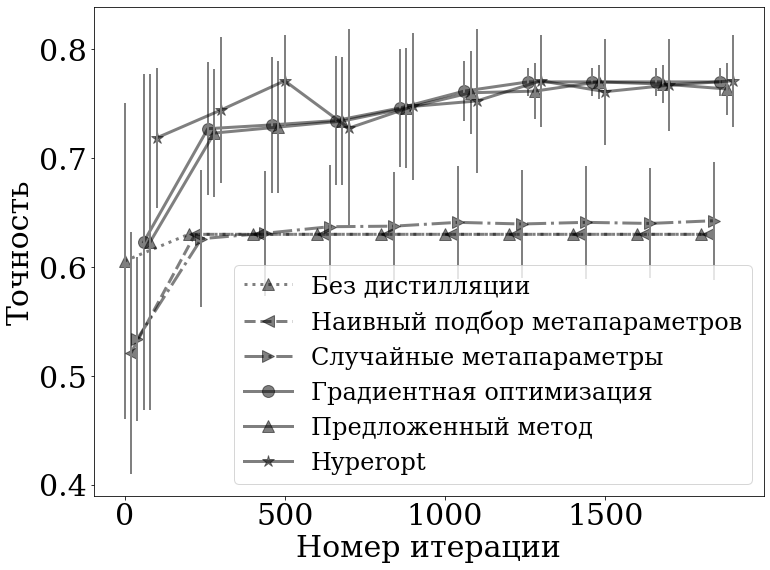

In [23]:
plot_data_params(data_b, 'accuracy', 'Без дистилляции', 'black', ':^')
plot_data_params(data_d, 'accuracy', 'Наивный подбор метапараметров', 'black', '--<',  shift=20)
plot_data_params(data_dr, 'accuracy', 'Случайные метапараметры', 'black', '-.>', shift=40)
plot_data_params(data_h, 'accuracy', 'Градиентная оптимизация', 'black', '-o', shift=60)
plot_data_params(data_s, 'accuracy', 'Предложенный метод', 'black', '-^', shift=80)
plot_data_params(data_ho, 'accuracy', 'Hyperopt', 'black', '-*', shift=100)
plt.legend()
plt.xlabel('Номер итерации')
plt.ylabel('Точность')
plt.savefig('../figs/synth_accuracy_rus_greyscale.png')

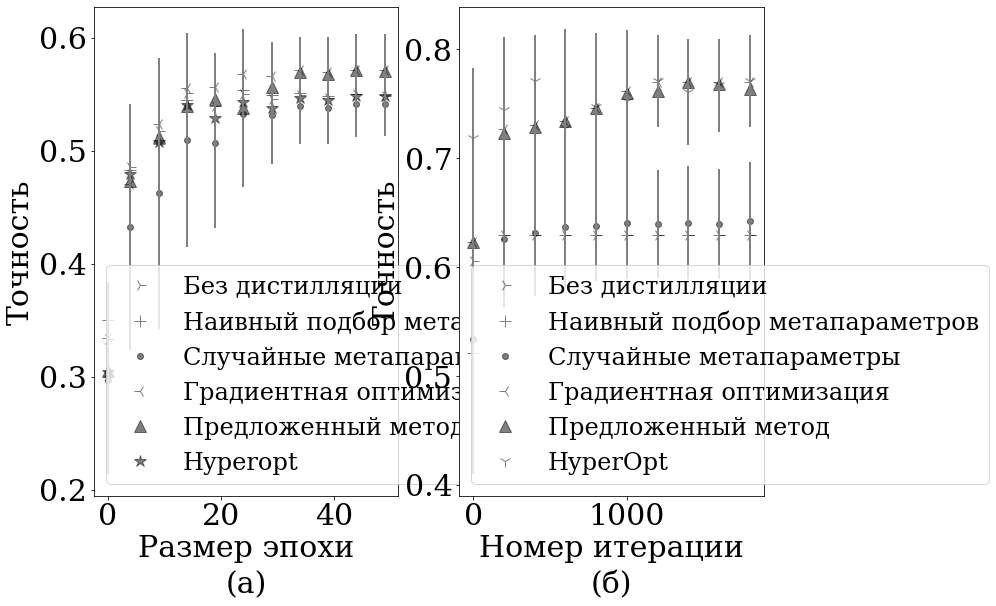

In [22]:
plt.subplot(1, 2, 1)

data_b = open_data_json("../log/exp33_nodistil.jsonl")
data_d = open_data_json("../log/exp33_distil.jsonl")
data_dr = open_data_json("../log/exp33_random.jsonl")
data_h = open_data_json("../log/exp33_opt.jsonl")
data_s = open_data_json("../log/exp33_splines.jsonl")
data_ho = open_data_json("../log/exp33_hyperopt.jsonl")

plot_data_params(data_b, 'accuracy', 'Без дистилляции', 'black', '4')
plot_data_params(data_d, 'accuracy', 'Наивный подбор метапараметров', 'black', '+')
plot_data_params(data_dr, 'accuracy', 'Случайные метапараметры', 'black', '.')
plot_data_params(data_h, 'accuracy', 'Градиентная оптимизация', 'black', '3')
plot_data_params(data_s, 'accuracy', 'Предложенный метод', 'black', '^')
plot_data_params(data_ho, 'accuracy', 'Hyperopt', 'black', '*')
plt.legend()
plt.title('(а)', y=-0.21)
plt.xlabel('Размер эпохи')
plt.ylabel('Точность')
# plt.savefig('../figs/mini_cifar_accuracy_rus_black.png')

plt.subplot(1, 2, 2)

data_b = open_data_json("../log/synthetic_exp8_nodistil.jsonl")
data_d = open_data_json("../log/synthetic_exp8_distil.jsonl")
data_dr = open_data_json("../log/synthetic_exp8_random.jsonl")
data_h = open_data_json("../log/synthetic_exp8_opt.jsonl")
data_s = open_data_json("../log/synthetic_exp8_splines_esize_10_period_2.jsonl")
data_ho = open_data_json("../log/synthetic_exp8_hyperopt.jsonl")

plot_data_params(data_b, 'accuracy', 'Без дистилляции', 'black', '4')
plot_data_params(data_d, 'accuracy', 'Наивный подбор метапараметров', 'black', '+')
plot_data_params(data_dr, 'accuracy', 'Случайные метапараметры', 'black', '.')
plot_data_params(data_h, 'accuracy', 'Градиентная оптимизация', 'black', '3')
plot_data_params(data_s, 'accuracy', 'Предложенный метод', 'black', '^')
plot_data_params(data_ho, 'accuracy', 'HyperOpt', 'black', '1')
plt.legend()
plt.title('(б)', y=-0.21)
plt.xlabel('Номер итерации')
plt.ylabel('Точность')
plt.savefig('../figs/rus_black.png')

In [3]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('../data', train=True, download=True,
                     transform=transforms.Compose([
                         transforms.RandomHorizontalFlip(),
                         transforms.ToTensor(),
                        #  transforms.Normalize(
                        #      (0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))
                     ])),
    batch_size=64, shuffle=True)

img = next(iter(train_loader))
print(inmg.shape)
# plt.imshow(transforms.ToPILImage()(img))

# %matplotlib inline
# import numpy as np
# from six.moves import cPickle 

# # f = open('data/cifar10/cifar-10-batches-py/data_batch_1', 'rb')
# # datadict = cPickle.load(f,encoding='latin1')
# # f.close()
# # X = datadict["data"] 
# # Y = datadict['labels']
# # X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
# # Y = np.array(Y)

# #Visualizing CIFAR 10
# fig, axes1 = plt.subplots(5,5,figsize=(3,3))
# for j in range(5):
#     for k in range(5):
#         i = np.random.choice(range(len(X)))
#         axes1[j][k].set_axis_off()
#         axes1[j][k].imshow(X[i:i+1][0])

0it [00:00, ?it/s]

KeyboardInterrupt: 

In [9]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [10]:
print('Fashion MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

Fashion MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

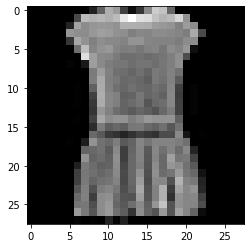

In [4]:
# pick a sample to plot
sample = 3
image = X_train[sample]

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

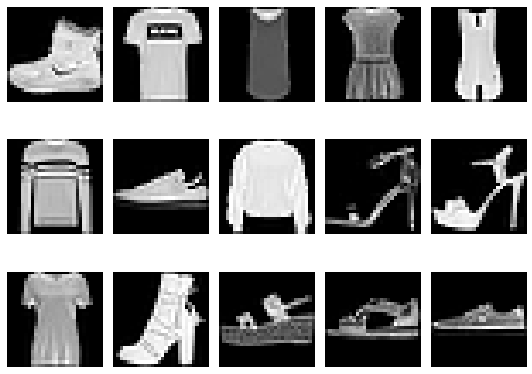

In [12]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
#     ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')

plt.tight_layout()
plt.savefig('../figs/fashionmnist_data.pdf')
plt.show()

In [4]:
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset


170500096/170498071 [==============================] - 171s 1us/step


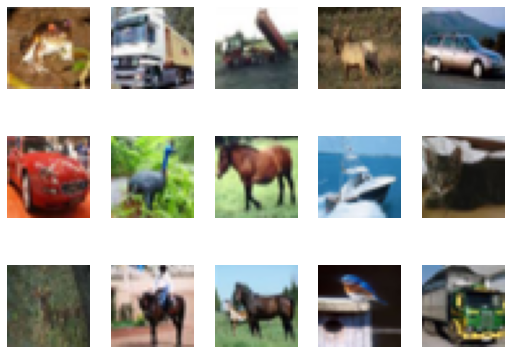

In [8]:
# print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
# print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# # plot first few images
# for i in range(9):
#     # define subplot
#     plt.subplot(330 + 1 + i)
#     # plot raw pixel data
#     plt.imshow(trainX[i])
# # show the figure
# plt.show()

# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = trainX[:num]
labels = trainy[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
#     ax.set_title('Label: {}'.format(labels[i]))
    ax.axis('off')

plt.tight_layout()
plt.savefig('../figs/cifar_data.pdf')
plt.show()